In [160]:
# all necessary files 
import pytorch_lightning as pl
import sklearn 
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import optuna
from sklearn.metrics import mean_squared_error

In [152]:
data=pd.read_csv(r"D:\ALL CODES\REINCEFORCEMENT LEARNING\Papers\PAPERS\chemE RL papers\Nanoparticles\Silver nanomaterils antibacterial  .csv")

categorical_cols = ['Process',"NEW_Capping agent", "NEW_reducing agent_class" ,"Order of reagent_CODE",'Steps', 'External_energy', 'Stirring', 'NEW_Capping agent', 'NEW_capping agent_Class', 'treatment', 'shape', 'Method of determination_size', 'bacterial  Culture medium', 'bacterial  Species']
data.replace('?', np.nan, inplace=True)

for col in categorical_cols:
    data[col] = data[col].astype('category')
object_cols = data.select_dtypes(['object']).columns

# Convert object columns to numeric
for cols in object_cols:
    try:
        data[cols] = pd.to_numeric(data[cols])
    except:
        pass
        #print(cols)
#data["Temp_Celcius"] = pd.to_numeric(data["Temp_Celcius"])
data["NEW_reducing agent"]=data["NEW_reducing agent"].astype("category")
X=data.drop(["Bacteria reduction mm"],axis=1)
Y=data["Bacteria reduction mm"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=666)

In [153]:
def fucker(data):
    for col in categorical_cols:
        data[col] = data[col].astype('category')
    object_cols = data.select_dtypes(['object']).columns

    # Convert object columns to numeric
    for cols in object_cols:
        try:
            data[cols] = pd.to_numeric(data[cols])
        except:
            pass
        #print(cols)
#data["Temp_Celcius"] = pd.to_numeric(data["Temp_Celcius"])
    data["NEW_reducing agent"]=data["NEW_reducing agent"].astype("category")
    return data
    

In [154]:

for col in X_train.columns:
    print(X_train[col].dtype)    

category
category
category
float64
category
float64
float64
float64
category
category
category
category
float64
float64
category
category
float64
category
float64
category
float64
float64
category
category


In [155]:
X_train['Process']

1109      biosynthesis
1238    phytosynthesis
857     phytosynthesis
317       biosynthesis
314      micosynthesis
             ...      
1115      biosynthesis
414     phytosynthesis
70      phytosynthesis
830     phytosynthesis
236     phytosynthesis
Name: Process, Length: 1125, dtype: category
Categories (6, object): ['biosynthesis', 'green', 'micosynthesis', 'phytochemical ', 'phytosynthesis', 'wet chemical']

In [158]:
def lighgbm_imputer(X_train,X_test):


    #print(len(X_test_dropped.columns),len(X_train.columns) )
    warnings.filterwarnings("ignore")
    for col in X_train.columns:
        X_train["NEW_reducing agent"]=X_train["NEW_reducing agent"].astype("category")
        X_train["Process"]=X_train["Process"].astype("category")
        X_trained_dropped=fucker(X_train).dropna()
        X_test_dropped=fucker(X_test).dropna()
        if X_train[col].dtype=="category":
            model_temp=lgb.LGBMClassifier(verbose=-1,n_jobs=-1)
            #drop=X_train.drop(col , axis=1)
            print(f"working on col {col} ,type {X_train[col].dtype}")
            
            temp_X_train_dropped=X_trained_dropped.drop(col,axis=1)
            temp_col=X_trained_dropped[col]
            model_temp.fit(X=temp_X_train_dropped,y=temp_col)
            temp_X_train=X_train.drop(col, axis=1)
            #debugging
            print(len(temp_X_train.columns))
            print(len(temp_X_train_dropped.columns))
            print(temp_X_train_dropped.columns)
            print(temp_X_train.columns)
            #print(axaxaxa)
            temp_X_train_col=model_temp.predict(temp_X_train)
            X_train[col]=temp_X_train_col
            
            #temp_X_test_col=model_temp.predict(X_test.drop(col))
            #X_test[col]=temp_X_test_col
            #X_test[col]=model_temp.predict(X_test.drop(col,axis=1))
        else:
            pass
            model_temp=lgb.LGBMRegressor(vebose=-1,n_jobs=-1)
            #drop=X_train.drop(col , axis=1)
            print(f"working on col {col} , type {X_train[col].dtype}")
            model_temp.fit(X_trained_dropped.drop(col , axis=1),X_trained_dropped[col])
            X_train[col]=model_temp.predict(X_train.drop(col,axis=1))
            X_test[col]=model_temp.predict(X_test.drop(col,axis=1))
    return X_train,X_test
    
    

In [159]:
X_train_imputed,X_test_imputed=lighgbm_imputer(X_train,X_test)

working on col Process ,type category
23
23
Index(['Steps', 'External_energy', 'Temp_Celcius', 'Stirring',
       'Synthesis_Duration_h', 'Scale_synthesis_ml', 'Precurcor_conc_mM',
       'NEW_Capping agent', 'NEW_capping agent_Class', 'NEW_reducing agent',
       'NEW_reducing agent_class', 'Capping agent concentration_mg/mL',
       'Reducing agent quantity mL', 'Order of reagent_CODE', 'treatment',
       'UVVIs PEAKS nm', 'shape', 'core size (nm)',
       'Method of determination_size', 'exposure dose concentration mg/mL',
       'Exposure duration  (h)', 'bacterial  Culture medium',
       'bacterial  Species'],
      dtype='object')
Index(['Steps', 'External_energy', 'Temp_Celcius', 'Stirring',
       'Synthesis_Duration_h', 'Scale_synthesis_ml', 'Precurcor_conc_mM',
       'NEW_Capping agent', 'NEW_capping agent_Class', 'NEW_reducing agent',
       'NEW_reducing agent_class', 'Capping agent concentration_mg/mL',
       'Reducing agent quantity mL', 'Order of reagent_CODE', 'trea

In [148]:
X_test_imputed.isna().sum()

Process                               0
Steps                                 0
External_energy                       0
Temp_Celcius                          0
Stirring                              0
Synthesis_Duration_h                  0
Scale_synthesis_ml                    0
Precurcor_conc_mM                     0
NEW_Capping agent                     0
NEW_capping agent_Class               3
NEW_reducing agent                    4
NEW_reducing agent_class              4
Capping agent concentration_mg/mL     0
Reducing agent quantity mL            0
Order of reagent_CODE                 5
treatment                             0
UVVIs PEAKS nm                        0
shape                                11
core size (nm)                        0
Method of determination_size         10
exposure dose concentration mg/mL     0
Exposure duration  (h)                0
bacterial  Culture medium            22
bacterial  Species                    0
dtype: int64

In [162]:

def objective(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1),
        'num_leaves': trial.suggest_int('num_leaves', 10, 150),
        'max_depth': trial.suggest_int('max_depth', 2, 17),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10)
    }
    lgb_train = lgb.Dataset(fucker(X_train_imputed), Y_train, categorical_feature=categorical_cols )
    #lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train, categorical_feature=categorical_cols)
    
    gbm = lgb.train(param, lgb_train)
    
    preds = gbm.predict(fucker(X_train_imputed), num_iteration=gbm.best_iteration)
    rmse = mean_squared_error(Y_train , preds,squared=False)
    
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000,n_jobs=-1)

print('Best trial:')
trial = study.best_trial
print('  Value: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


[I 2024-12-01 20:22:23,965] A new study created in memory with name: no-name-41235afb-bc8b-4a5f-ba02-5c1dc4b0ef41
[I 2024-12-01 20:22:24,215] Trial 2 finished with value: 5.48625780934467 and parameters: {'learning_rate': 0.06089709530202243, 'num_leaves': 27, 'max_depth': 2, 'min_data_in_leaf': 48, 'feature_fraction': 0.5880418862226393, 'bagging_fraction': 0.5192808641219369, 'bagging_freq': 8}. Best is trial 2 with value: 5.48625780934467.
[I 2024-12-01 20:22:24,311] Trial 1 finished with value: 5.657149400310417 and parameters: {'learning_rate': 0.026650108170912182, 'num_leaves': 149, 'max_depth': 3, 'min_data_in_leaf': 65, 'feature_fraction': 0.45964113764762904, 'bagging_fraction': 0.8527190338367994, 'bagging_freq': 6}. Best is trial 2 with value: 5.48625780934467.
[I 2024-12-01 20:22:24,329] Trial 0 finished with value: 5.357258194376971 and parameters: {'learning_rate': 0.03417370294150519, 'num_leaves': 72, 'max_depth': 4, 'min_data_in_leaf': 81, 'feature_fraction': 0.435669

Best trial:
  Value: 2.5840343247255553
  Params: 
    learning_rate: 0.09754372970169654
    num_leaves: 144
    max_depth: 16
    min_data_in_leaf: 10
    feature_fraction: 0.9839878532115445
    bagging_fraction: 0.9691919893206703
    bagging_freq: 2


In [164]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

params=trial.params
model=lgb.LGBMRegressor(**params)
#model2=lgb.LGBMRegressor()
tests=[]
y_preds=[]
y_rmse=[]
for i in range(1 , 10):
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_imputed, Y_train, test_size=i/10, random_state=666)
    tests.append(f"{i*10}")
    y_predss = model.fit(X_train2, y_train2).predict(X_test2)
    r2=r2_score(y_test2 , y_predss)
    msse=mean_squared_error(y_test2,y_predss)
    y_rmse.append(msse)
    y_preds.append(r2)
#y_predss2 = model2.fit(X_train2, y_train2).predict(X_test2)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.9839878532115445, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9839878532115445
[LightGBM] [Warning] bagging_fraction is set=0.9691919893206703, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9691919893206703
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.9839878532115445, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9839878532115445
[LightGBM] [Warning] bagging_fraction is set=0.9691919893206703, subsample=1.0 will be ignored. Current value: ba

Text(0, 0.5, 'R2 score')

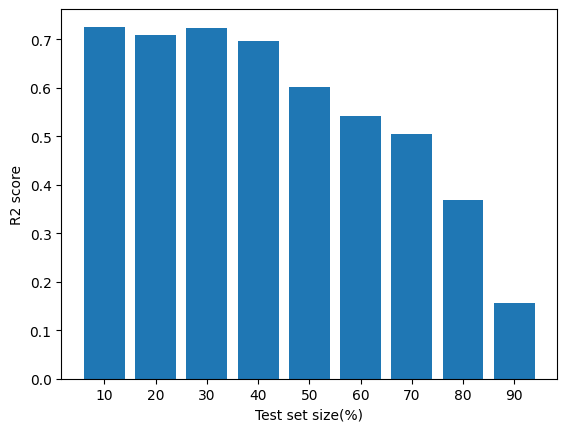

In [165]:

plt.bar(x=tests ,height=y_preds )
plt.xlabel("Test set size(%)")
plt.ylabel("R2 score")
#print(f'R² value: {r2}')

In [183]:
y=model.predict(X_test)


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.9839878532115445, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9839878532115445
[LightGBM] [Warning] bagging_fraction is set=0.9691919893206703, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9691919893206703
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [185]:
print(y)

[ 1.04612076 10.94623671 18.45408842 14.7005337  20.12923349 21.33026189
 16.6885745   9.85742407 12.0401694   5.72325335  8.95118254  2.22404867
 16.6885745  17.62565768 21.33026189  6.69883834 16.02742743 21.33026189
 14.7005337  14.37880597  9.4119363  17.59350855 18.04661303 13.87272735
 16.17935594  9.71875935 10.63486516  8.49468524 20.32385815 13.53969715
  2.89369609  6.94608349 12.28152487  6.69883834 14.19169358  7.05796552
 10.94623671 16.68050509 18.32682896 13.45474965 16.17139598  9.98117232
  1.72587984 12.19044063  5.38684241  7.70309595  9.94441089 13.2838653
  9.11427785 13.2838653  16.57026619 16.68050509  2.36087257  3.89406921
 10.42699018  6.26201213 12.18550447 13.0148992  10.94623671  5.38684241
 16.34062735 14.46022607 12.11560589 13.87272735  3.83092629 10.96878682
 14.7005337  15.17204291  7.69264739  6.16923292  9.88779193  7.82364949
  6.32946202 17.76871683  7.05796552 10.94623671 10.53195551 15.38641396
 14.00919035 12.1889785  14.19169358 11.53585861 21.

In [186]:
Y_test

1034     9.00
1        6.00
220      8.87
194      9.90
195     17.80
        ...  
840     18.00
397     17.00
1106    25.00
762      7.00
467     18.00
Name: Bacteria reduction mm, Length: 126, dtype: float64

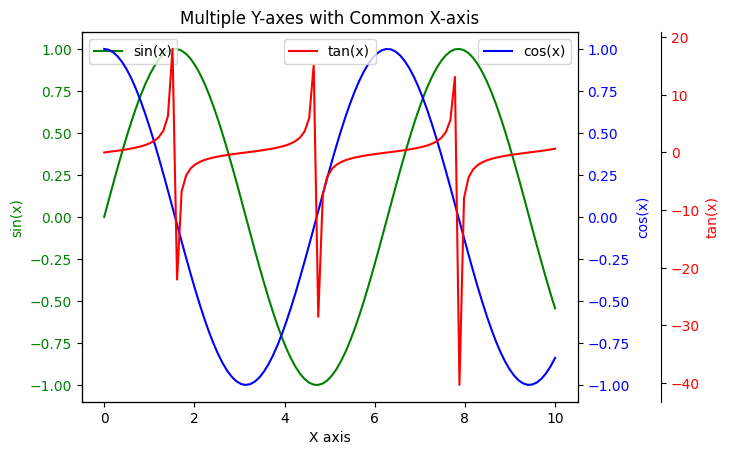

In [187]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

fig, ax1 = plt.subplots()

# Plot the first y-axis
ax1.plot(x, y1, 'g-', label='sin(x)')
ax1.set_xlabel('X axis')
ax1.set_ylabel('sin(x)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(x, y2, 'b-', label='cos(x)')
ax2.set_ylabel('cos(x)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Create a third y-axis
ax3 = ax1.twinx()
ax3.plot(x, y3, 'r-', label='tan(x)')
ax3.set_ylabel('tan(x)', color='r')
ax3.tick_params(axis='y', labelcolor='r')

# Adjust the position of the third y-axis
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis outward

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='upper center')

plt.title('Multiple Y-axes with Common X-axis')
plt.show()